# Uniform Distribution

We have already seen the Uniform Distribution in several forms. First, if we have a fair coin, with outcomes $\{heads, tails\}$ and $P(heads)=P(tails)=.5$ then we have a uniform distribution. However, we don't usually model coin flips this way because the coin isn't always fair. If we have a fair die, on the other hand, with six possible outcomes then the probability of each outcome is $\frac{1}{6}$. This is a canonical uniform distribution. When the outcomes are a small number of discrete values or any number of qualitative labels and all are equally likely, this is a *discrete* uniform distribution. If we are dealing with continuous values, we have a *continuous* uniform distribution.

There isn't much to the generating story for the Uniform distribution. If we have a process that emits values or events in a range $(a, b)$, all with equal probability, then we can characterize that process with a Uniform distribution. The notation to indicate that a random variable $X$ is uniformly distributed is $X \sim U(a, b)$.

The Method of Moments estimators of $a$ and $b$ are:

$\hat{a} = m_1 - \sqrt{3 m_2}$

$\hat{b} = m_1 + \sqrt{3 m_2}$

where $m_1$ and $m_2$ are the first and second moments. Remember that we distinguish between the *parameters* "mean" and "variance", the moments of an empirical distribution and the descriptive *statistics* "mean" and "variance". The formula for the first moment $m_1$ happens to be the formula for the arithmetic mean but as we'll see in a minute, the mean of a uniformly distributed variable has a different formula than the arithmetic mean. Yes, this is very confusing.

If we know $a$ and $b$ then the formulas for are:

$mean = \frac{a + b}{2}$

$median = \frac{a + b}{2}$

If we are dealing with a *discrete* Uniform distribution then,

$variance = \frac{(b - a + 1)^2 + 1}{12}$

but if we are dealing with a *continuous* Uniform distribution then,

$variance = \frac{(b - a)^2}{12}$

## Standard Uniform Distribution

Many distributions have "standard" parameterizations. Distributions with those parameters are often used as special reference distributions and are thus called standard distributions. The *standard* Uniform distribution is $X \sim U(0, 1)$. It is the distribution simulated by `rand` in most computer programming languages.

### Example

Let's proceed with an example for the continuous Uniform distribution which is one we're going to see a lot. We'll use the case of $X ~ U( 0, 1)$ or the Standard Uniform distribution.

We will often take the Uniform distribution to be our base case when deriving other distributions throughout this chapter so we'll start by using the `randn` library from Numpy.

**Special Note**

We aren't *really* generating random numbers when using `randn` but instead we're generating *pseudo* random numbers, that is, we're generating random numbers using an algorithm. As John von Neumann said,

> Any one who considers arithmetical methods of producing random digits is, of course, in a state of sin. For, as has been pointed out several times, there is no such thing as a random number — there are only methods to produce random numbers, and a strict arithmetic procedure of course is not such a method.

and while he was *for* the use of such random numbers we musn't forget their algorithmic origins.

This discussion brings us to *seeds*. A random number *generator* (RNG) in a computer requires a seed number. Usually this is set automatically and we needn't worry about it. However, because our random numbers are being produced by algorithmic means and because I want these examples to execute the same way each time. I'm going to set the random seed manually. Although I will have more to say about this later, it is something you should consider doing as well.

The usual way to do this is to execute:

```
from time import time
print( time.now())
```
and use the resulting number. It's important you use the number and *not* the function call or the purpose of setting a fixed see will be lost.

In [1]:
import numpy as np # always import for basic mathematical functions
from numpy.random import seed
from scipy.stats import uniform

In [2]:
seed( 1504114842)

Here is a link for the [`uniform`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.uniform.html#numpy.random.uniform) documentation as well as links to all of the distribution function we'll be using through this chapter, [random routines](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html).

First we simulate 100 observations from our random process. I'm going to print out the first 10 observations just to inspect them.

In [3]:
data = uniform.rvs(0, 1, 100)
data[ 0:10]

array([0.81618856, 0.50343473, 0.13018895, 0.50069615, 0.78875964,
       0.85452512, 0.37350999, 0.80944048, 0.6529213 , 0.74197177])

These are the two main libraries we'll use for visualization, Seaborn which makes the plots look nicer than the default and Matplotlib which is the main plotting library for Python.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

in order to get figures to show up in Notebooks, you need to use a "magic":

In [5]:
%matplotlib inline

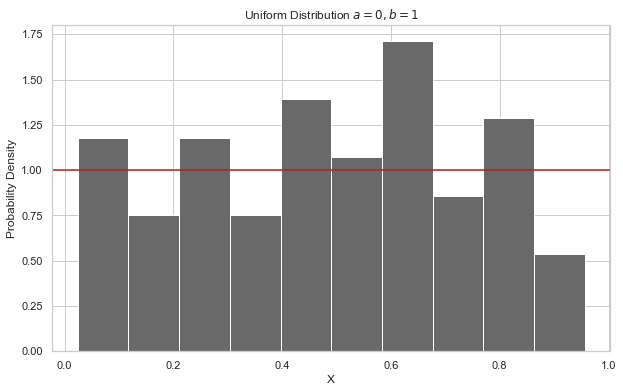

In [6]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data, density=True, color="DimGray")
axes.axhline(1.0, 0.0, 1.0, color="firebrick")
axes.set_title( "Uniform Distribution $a=0, b=1$")
axes.set_ylabel( "Probability Density")
axes.set_xlabel( "X")

plt.show()
plt.close()

I think it's worth noting at this point that the data doesn't look particularly normally distributed. For reference, the theoretical distribution is shown with a line.

Based on our discussion above, we can calculate the first and second moments:

In [7]:
m1 = np.mean( data)
m2 = np.var( data)
print( "m1", m1)
print( "m2", m2)

m1 0.4843949517552979
m2 0.06451767826448342


We can use our Method of Moments estimators to estimate $\hat{a}$ and $\hat{b}$:

In [8]:
a_hat = m1 - np.sqrt( 3 * m2)
b_hat = m1 + np.sqrt( 3 * m2)
print( "a-hat", a_hat)
print( "b-hat", b_hat)

a-hat 0.04444832454530295
b-hat 0.9243415789652929


Our estimates are pretty close to the real deal, $a=0$ and $b=1$. We will talk *much* more about this in the next chapter on Statistical Inference. For now, we're just getting a feel the calculations.

Assuming that we really have a Uniform distribution parameterized by $a$ and $b$ our estimators of the mean and variance are:

In [9]:
mean = (1/2) * (b_hat + a_hat)
variance = (1/12) * (b_hat - a_hat)**2
print( "mean", mean)
print( "variance", variance)

mean 0.4843949517552979
variance 0.06451767826448343


Notice that the first moment and mean and second moment and variance are each the same. Exactly how all of this fits together will be discussed in the chapter on Univariate Modeling. For now, we just want to learn about the various distributions.

## Discrete Uniform Distribution
We've already run into the discrete Uniform distribution with The Birthday Problem. There we modeled birthdays as occurring uniformly at random on any of the 365 days of a (non leap) year. Here we'll repeat that exercise and visualize the results. There are several things to note. First, the random function are often *exclusive* of the $b$ value so we actually need to specify $b + 1$. Second, the probability of any given value is $\frac{1}{365}$ so we need to weight the raw *counts* which would normally go into the histogram by the expected probability.

In [10]:
from numpy.random import randint

In [11]:
data = randint(1, 366, 40)

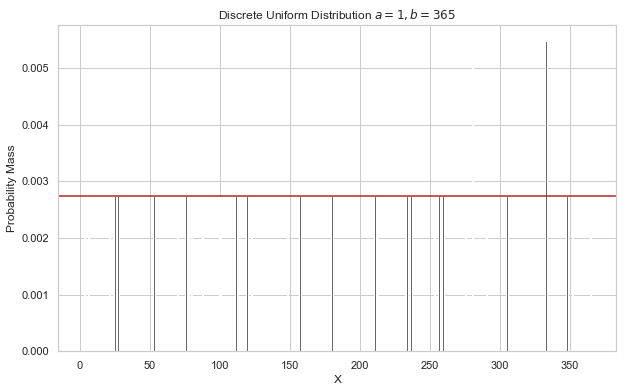

In [12]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1, 1, 1)
axes.hist(data, bins=365,weights=np.zeros_like(data) + 1. / 365, color="DimGray")
axes.axhline(1.0/365, 0.0, 1.0, color="firebrick")
axes.set_title( "Discrete Uniform Distribution $a=1, b=365$")
axes.set_ylabel( "Probability Mass")
axes.set_xlabel( "X")

plt.show()
plt.close()

Note that this time the data does look pretty uniform. You generally need more data to estimate a continuous distribution than a discrete one, other things being equal.

The most common use of the Uniform probability distribution--because it has so little information in it except $(a, b)$--is "I want to generate some arbitrary numbers between $a$ and $b$ and I'm too lazy to make them up.". Very, very interesting results can be derived from such humble beginnings as we will soon see.